# Back testing and Predicting Oil Stock Exxon Mobile (Ticker Symbol XOM)

 The idea of Back testing and predicting XOM was the result of recent Presidential Election and subsequently on December 13 , 2016  President Elect selected  Rex Tillerson as nominee for Secretary of State.
Tillerson has served as CEO of Exxon Mobile from 2006 to 2016 and I have been wondering will it have any impact price on XOM.  
For my analysis, I will consider market indicator, volatility and worldwide crude prices.
For market indicator I have considered SPY, This is the granddaddy of ETFs, the oldest and most easily recognized of the exchange-traded funds. It tops the list in terms of AUM and trading volume, making it appropriate for both tactical traders and buy-and-hold investors. The fund tracks the S&P 500, which are a group of equities from the U.S. large-cap space (not always the largest, keep in mind) and selected by committee. This can be considered to have Beta of 1.
(Reference  http://www.investopedia.com/articles/etfs/top-etfs-long-term-investments/#ixzz4W4a5oahs )

For volatility I will consider Volatility Index ^VIX , VIX is the ticker symbol for the Chicago Board Options Exchange (CBOE) Volatility Index, which shows the market's expectation of 30-day volatility. It is constructed using the implied volatilities of a wide range of S&P 500 index options. This volatility is meant to be forward looking, is calculated from both calls and puts, and is a widely used measure of market risk, often referred to as the "investor fear gauge." 
(Reference http://www.investopedia.com/terms/v/vix.asp#ixzz4W4YteIHC)

For worldwide crude I have considered BRENT and WTI. West Texas Intermediate (WTI) crude oil is a grade of crude oil used as a benchmark for crude oil pricing. The US Department of Energy provides daily prices for WTI Crude, and NYMEX uses WTI Crude as the underlying instrument for its crude oil futures contracts. Brent (North Sea) crude oil is a grade of crude oil used as a benchmark for crude oil pricing. The US Department of Energy provides daily prices for Brent Crude, and ICE uses Brent Crude as the underlying instrument for its crude oil futures contracts.
(Reference  https://www.quandl.com/collections/markets/crude-oil)

Backtesting is the process of testing a trading strategy on relevant historical data to ensure its viability before the trader risks any actual capital. A trader can simulate the trading of a strategy over an appropriate period of time and analyze the results for the levels of profitability and risk.http://www.investopedia.com/terms/b/backtesting.asp

In general, as the VIX rises (which indicates greater fear of market volatility) stocks tend to decline and vise versa. However my assumption is that  volatility spikes the oil market , I will first try to understand the following relationship :
1.	Relationship between market (SPY) and VIX , if VIX rises market declines
2.	Relationship between VIX and Crude oil (BRENT and WTI), I am assuming spike in volatility may spike the Crude
3.	Relationship between Crude and XOM and my assumption is if crude spikes XOM should spike.
4.	If my assumptions are correct then use BRENT, WTI and VIX to backtest XOM
5.	For back test I will use multiple classification and regression and see which one predicts the best.


## Data download from Yahoo Finance and Quandl

In [106]:
# Pretty display for notebooks
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import numpy as np

# Data Download

Here I will use Yahoo Finance and Quandl to download data
pandas_datareader is used to download data from yahoo 
quandl is used to import data from Quandl
Data download period is from ***1990, 1, 1 to 2017, 01, 31
I am storing and reading data in/from C://Training/udacity/MachineLearningEngineerNanodegree/P5/Project/Final/BackTestClassRegression/data/
Please change the directory or use a logical path for your testing***

WTI and BRENT have been downloaded from Quandl using my login
^VIX(VIX), SPY and XOM has been downloaded from Yahoo Finance.

I have also changed the last coulmn name from "Adj Close" for data from Yahoo Finance and "Value" from Quandl  to name AdjClose_<Ticker Name> and have added a new column called Return_<Ticker Name> which is the percentage change of the AdjClose column for respective ticker



In [39]:
# -*- coding: utf-8 -*-
"""
DataDownload.py
Created on Tue Jan 17 17:39:35 2017

@author: shubra
"""

import pandas as pd
#from pandas.io import data
from pandas_datareader import data, wb
import quandl
import datetime


start = datetime.datetime(1990, 1, 1)
end = datetime.datetime(2017, 01, 31)

path = 'C://Training/udacity/MachineLearningEngineerNanodegree/P5/Project/Final/BackTestClassRegression/data/'

## XOM 
xom =  data.get_data_yahoo('XOM', start, end)
xom.columns.values[-1] = 'AdjClose'
xom.columns = xom.columns + '_XOM'
xom['Return_XOM'] = xom['AdjClose_XOM'].pct_change()
xom.to_csv(path+'XOM.csv')

## ^VIX 
vix =  data.get_data_yahoo('^VIX', start, end)
vix.columns.values[-1] = 'AdjClose'
vix.columns = vix.columns + '_VIX'
vix['Return_VIX'] = vix['AdjClose_VIX'].pct_change()
vix.to_csv(path+'VIX.csv')


## SPY
sp =  data.get_data_yahoo('SPY', start, end)
sp.columns.values[-1] = 'AdjClose'
sp.columns = sp.columns + '_SPY'
sp['Return_SPY'] = sp['AdjClose_SPY'].pct_change()
sp.to_csv(path+'SPY.csv')


###  WTI  
##https://www.quandl.com/api/v3/datasets/EIA/PET_RWTC_D.csv?api_key=zRHWHkTCcRK2-VzfgKwh

wti = quandl.get("EIA/PET_RWTC_D", trim_start='1990-01-01', trim_end='2017-01-31')
wti.columns.values[-1] = 'AdjClose'
wti.columns = wti.columns + '_WTI'
wti['Return_WTI'] = wti['AdjClose_WTI'].pct_change()
wti.to_csv(path+'WTI.csv')

########## BRENT
##https://www.quandl.com/api/v3/datasets/EIA/PET_RBRTE_D.csv?api_key=zRHWHkTCcRK2-VzfgKwh

brent =  quandl.get("EIA/PET_RBRTE_D", trim_start='1990-01-01', trim_end='2017-01-31')
brent.columns.values[-1] = 'AdjClose'
brent.columns = brent.columns + '_BRENT'
brent['Return_BRENT'] = brent['AdjClose_BRENT'].pct_change()
brent.to_csv(path+'BRENT.csv')


### GOOG 
#out =  pd.io.data.get_data_yahoo('GOOG', start, end)
#
#out.columns.values[-1] = 'AdjClose'
#out.columns = out.columns + '_GOOG'
#out['Return_GOOG'] = out['AdjClose_GOOG'].pct_change()
#
#out.to_csv(path+'GOOG.csv')


# Code to visualize data at a glance and see if the above mentioned assumptions are fair to consider

                   SPY        XOM    WTI  BRENT    VIX
2017-01-09  226.460007  87.040001  51.95  54.39  11.56
2017-01-10  226.460007  85.930000    NaN    NaN  11.49
2017-01-11  227.100006  86.809998    NaN    NaN  11.26
2017-01-12  226.529999  86.339996    NaN    NaN  11.54
2017-01-13  227.050003  86.349998    NaN    NaN  11.23


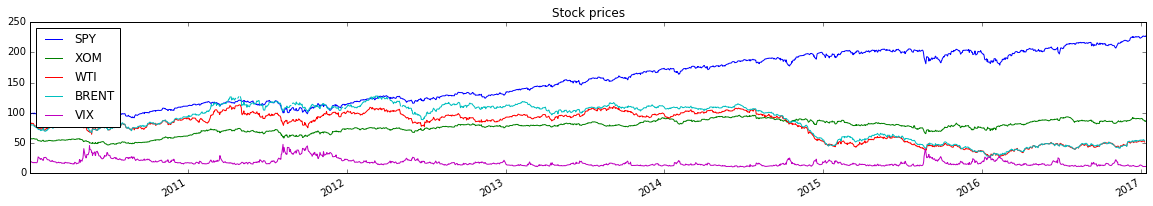

In [52]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#infile='./data/'
infile='C://Training/udacity/MachineLearningEngineerNanodegree/P5/Project/Final/BackTestClassRegression/data'

def symbol_to_path(symbol, base_dir=infile):
    return os.path.join(base_dir,"{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        #print ("symbol =",'AdjClose_'+str(symbol))
        AdjClose = 'AdjClose_'+str(symbol)
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',parse_dates=True, usecols=['Date', AdjClose], na_values=['nan'])
        df_temp = df_temp.rename(columns={AdjClose: symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df
#Return_BRENT

def get_Return(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        #print ("symbol =",'AdjClose_'+str(symbol))
        Return = 'Return_'+str(symbol)
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',parse_dates=True, usecols=['Date', Return], na_values=['nan'])
        df_temp = df_temp.rename(columns={Return: symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price", figsize=(10,10)):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12,figsize=(20,5))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()
    
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    daily_return = df.copy()
    daily_return[1:] = (df[1:]/df[:-1].values)-1
    daily_return.ix[0,:] =0 
    return daily_return
   
def plot_daily_return(df, title="Daily returns", xlabel="periods",ylabel="Daily returns"):
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title, xlabel,ylabel)

def AdjClose():
    # Read data
    dates = pd.date_range('2010-01-01', '2017-01-17')
    symbols = ['XOM','WTI','BRENT','VIX']
    df = get_data(symbols, dates)
    print(df.tail())
    df.plot(title="Stock prices", figsize=(20,3))
    plt.show()
    
AdjClose()

def Return_data():
    # Read data
    dates = pd.date_range('2016-01-01', '2017-01-17')
    symbols = ['XOM','WTI','BRENT','VIX']
    df = get_Return(symbols, dates)
    print(df.tail())
    df.plot(title="Stock Return", figsize=(20,3))
    plt.show()
    


                 SPY       XOM       WTI     BRENT       VIX
2017-01-09 -0.003301 -0.016497 -0.037607 -0.027013  0.021201
2017-01-10  0.000000 -0.012753       NaN       NaN -0.006055
2017-01-11  0.002826  0.010241       NaN       NaN -0.020017
2017-01-12 -0.002510 -0.005414       NaN       NaN  0.024867
2017-01-13  0.002296  0.000116       NaN       NaN -0.026863


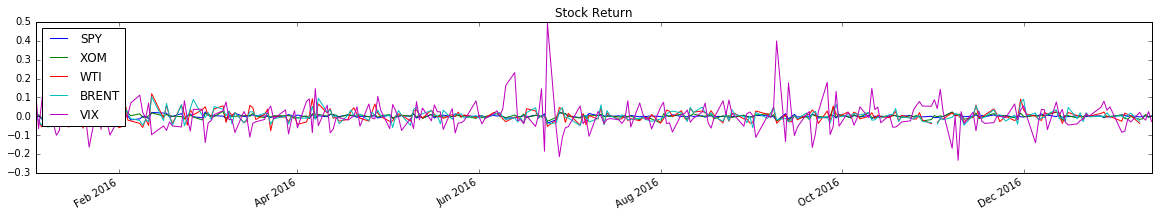

In [53]:
Return_data()

# Visualize pattern on Daily return bewteen WTI, BRENT, SPY (Market Return this is at Beta 1) , Volatility(VIX) and XOM

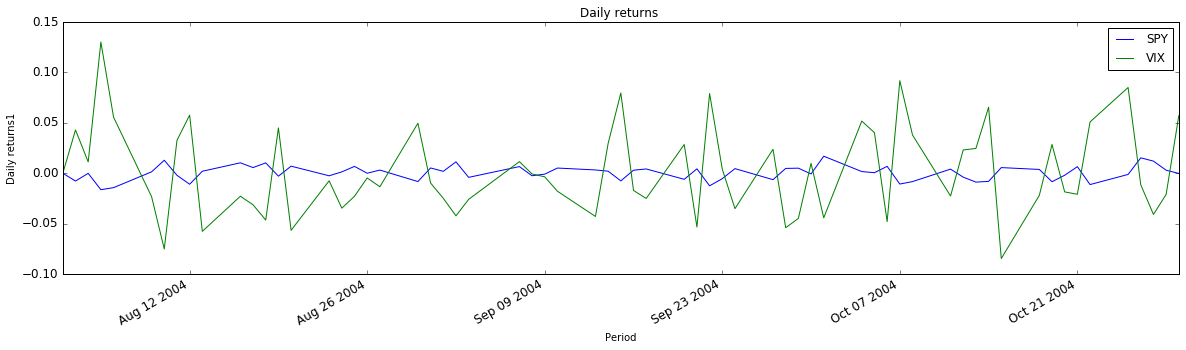

In [88]:
dates = pd.date_range('2004-08-01', '2004-10-30')
symbols = ['VIX']
#df_daily_ret = get_Return(symbols, dates)
df_daily_ret =get_data(symbols, dates)
plot_daily_return(df_daily_ret, "Daily returns ",'Period', ylabel="Daily returns1")

# From above we see as the VIX rises (which indicates greater fear of market volatility--means SPY the market indicator) stocks tend to decline and vise versa. 

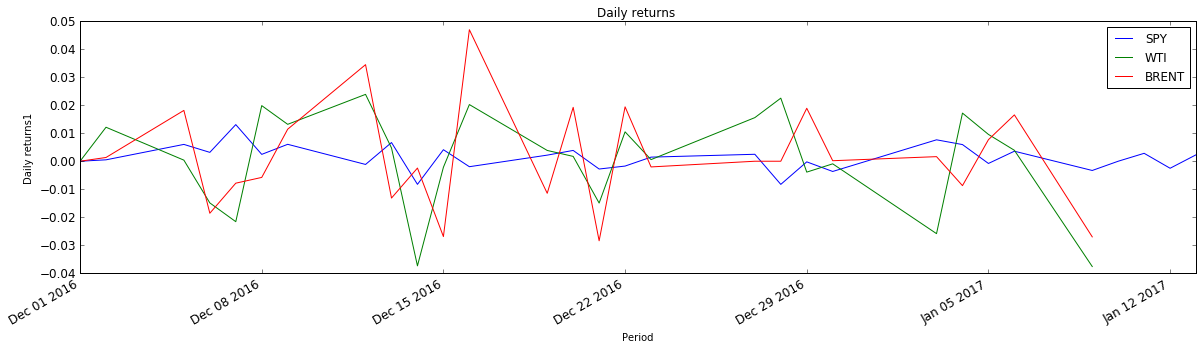

In [87]:
dates = pd.date_range('2016-12-01', '2017-01-17')
symbols = ['WTI','BRENT']
#df_daily_ret = get_Return(symbols, dates)
df_daily_ret =get_data(symbols, dates)
plot_daily_return(df_daily_ret, "Daily returns ",'Period', ylabel="Daily returns1")

# From the above figure we see that BRENT and WTI move opposite to SPY for the given period

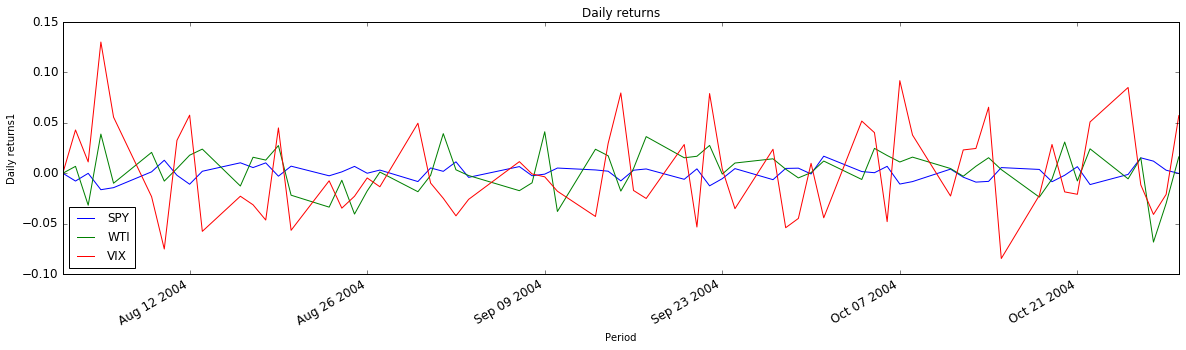

In [86]:
symbols = ['WTI','VIX']
#df_daily_ret = get_Return(symbols, dates)
df_daily_ret =get_data(symbols, dates)
plot_daily_return(df_daily_ret, "Daily returns",'Period', ylabel="Daily returns1")

# From the above figure we see that VIX and WTI move opposite to SPY for the given period

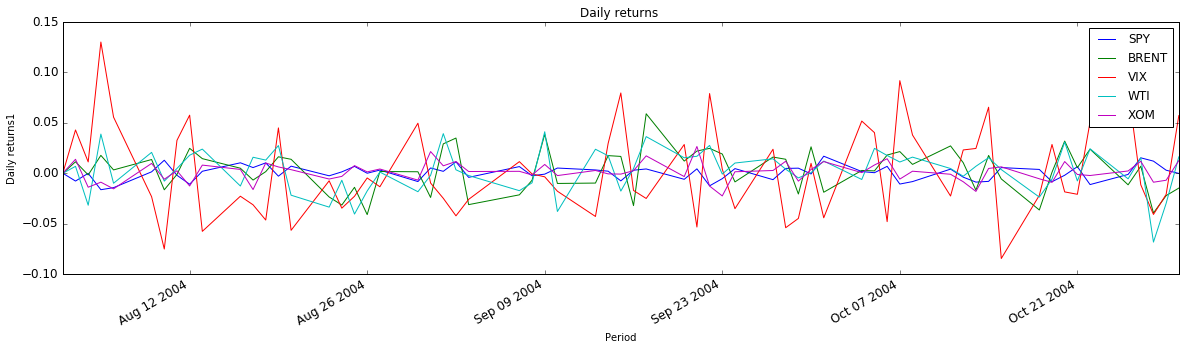

In [89]:
symbols = ['BRENT','VIX','WTI','XOM']
#df_daily_ret = get_Return(symbols, dates)
df_daily_ret =get_data(symbols, dates)
plot_daily_return(df_daily_ret, "Daily returns ",'Period', ylabel="Daily returns1")

# Above shows XOM matches with the combination of VIX, WTI,BRENT 

## ***This provides an input for me to backtest and predict XOM based on VIX, BRENT and WTI***



## ***In the Next code snippet we will try to use SPY Return Bollinger Band to understand if  the return from WTI, BRENT perfectly fits within SPY's Lower and Upper band , if not then possibly we will not consider SPY for our  model analysis ***



In [74]:
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling(window).mean()

    #return pd.rolling_mean(values, window=window)


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return values.rolling(window).std()

    #return pd.rolling_std(values, window = window)

def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band = rm + (2*rstd)
    lower_band = rm - (2*rstd)
    return upper_band, lower_band



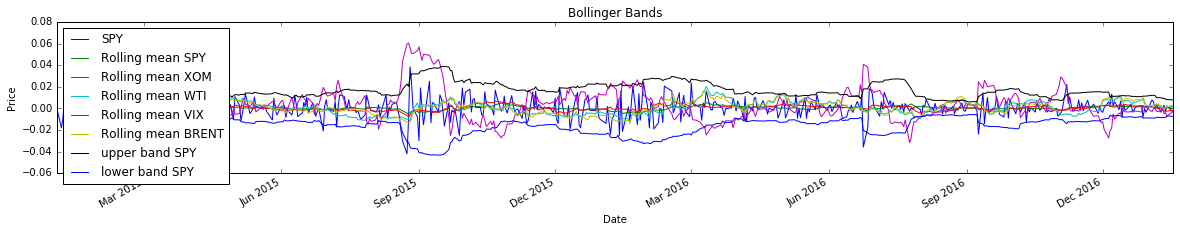

In [129]:
symbols = ['WTI','VIX','XOM','BRENT']
dates = pd.date_range('2015-01-01', '2017-01-17')
#df = get_data(symbols, dates)
df = get_Return(symbols, dates)

rm_SPY = get_rolling_mean(df['SPY'], window=20)
rm_XOM = get_rolling_mean(df['XOM'], window=20)
rm_WTI = get_rolling_mean(df['WTI'], window=20)
rm_VIX = get_rolling_mean(df['VIX'], window=20)
rm_BRENT = get_rolling_mean(df['BRENT'], window=20)

    # 2. Compute rolling standard deviation
rstd_SPY = get_rolling_std(df['SPY'], window=20)

    # 3. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)


ax = df['SPY'].plot(title="Bollinger Bands", label='SPY',figsize=(20,3))
#    df['IBM'].plot(title="Bollinger Bands", label='IBM',ax=ax)
rm_SPY.plot(label='Rolling mean SPY', ax=ax)
rm_XOM.plot(label='Rolling mean XOM', ax=ax)
rm_WTI.plot(label='Rolling mean WTI', ax=ax)
rm_VIX.plot(label='Rolling mean VIX', ax=ax)
rm_BRENT.plot(label='Rolling mean BRENT', ax=ax)

upper_band.plot(label='upper band SPY', ax=ax)
lower_band.plot(label='lower band SPY', ax=ax)

    # Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

# From above figure's I feel that my assumption of backtesting XOM with WTI, BRENT and VIX may be a proper option

# Modeling and Analysis 
1. SECTION 1 -- LEARNING AND PERFORMANCE CALCULATION (LearnndPerfCalc.py)
2. SECTION 2 -- PLOT LEARNING AND MODEL COMPLEXITY (PlotModelCcomplexity.py)
3. SECTION 3 -- GET DATA SETS (GetDataSets.py)
4. SECTION 4-- DATA PREPRATION AND NORMALIZATION (DataPrepNormalization.py)
5. SECTION 5 PREPARE DATA FOR CLASSIFICATION MODELS (PrepDataForClassification.py)   
6. SECTION 6 PREPARE DATA FOR REGRESSION MODELS  and Call regression models(PrepDataForRegression.py)
7. SECTION 7  CALL THE CLASSIFICATION MODEL (CallClassification.py)
8. SECTION 8 REGRESSION FUNCTIONS (RegressionFunctions.py)
9. SECTION 9 CLASSIFICATION FUNCTIONS (CallClassification.py)

## 1. SECTION 1 -- LEARNING AND PERFORMANCE CALCULATION (LearnndPerfCalc.py)

***"""     SECTION 1  LEARNING AND PERFORMANCE CALCULATION
1. Calculates the Learning performance of several models with varying sizes of training data
2. Calculates the performance of the model as model complexity
3. Calculates and returns the total error between true and predicted value

"""***

In [107]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



################ SECTION 1 LEARNING AND PERFORMANCE CALCULATION ############################################
"""     SECTION 1  LEARNING AND PERFORMANCE CALCULATION
1. Calculates the Learning performance of several models with varying sizes of training data
2. Calculates the performance of the model as model complexity
3. Calculates and returns the total error between true and predicted value

"""
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = plt.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()
    
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))
    

#    print("train_err  ",train_err)
    # Plot the model complexity graph
    plt.figure(figsize=(7, 5))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    plt.plot(max_depth, train_err, lw=2, label = 'Training Error')
    plt.legend()
    plt.xlabel('Maximum Depth')
    plt.ylabel('Total Error')
    plt.show()

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = None
    error = mean_squared_error(y_true,y_predict)
    return error


## Section -2
"""       SECTION 2  PLOT LEARNING AND MODEL COMPLEXITY
1. Plot Learning Complexity
2. Plot Model Complexity

"""

In [108]:
import numpy as np
import matplotlib.pyplot as plt
#from LearnndPerfCalc import  performance_metric

################ SECTION 2  PLOT LEARNING AND MODEL COMPLEXITY ############################################
"""       SECTION 2  PLOT LEARNING AND MODEL COMPLEXITY
1. Plot Learning Complexity
2. Plot Model Complexity

"""
def plotLearningPerformance(X_train,y_train,X_test,y_test,figure_size_x,figure_size_y,regressor_type,Regression_Nmae):
   # Create the figure window
    fig = plt.figure(figsize=(figure_size_x,figure_size_y))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))
    
    # Create four different models based on max_depth
#    for k, depth in enumerate([1,3,6,10]):
        
    for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
#            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor_type.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor_type.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor_type.predict(X_test))

        # Subplot the learning curve graph
    ax = fig.add_subplot(2, 2, 0+1)
    ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
    ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
    ax.legend()
#    ax.set_title('max_depth = %s'%(depth))
    ax.set_title('Learning Performances ')
    
    ax.set_xlabel('Number of Data Points in Training Set')
    ax.set_ylabel('Total Error')
    ax.set_xlim([0, len(X_train)])
    Regression_Nmae = Regression_Nmae + ' Regression Learning Performances'
    # Visual aesthetics
    fig.suptitle(Regression_Nmae, fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()
       
    
def plotModelComplexity(X_train, y_train, X_test, y_test,regressor_type,Regression_Nmae):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
#    max_depth = np.arange(1, 14)
#    train_err = np.zeros(len(max_depth))
#    test_err = np.zeros(len(max_depth))

#    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
#    regressor = DecisionTreeRegressor(max_depth = d)
#
#        # Fit the learner to the training data
#    regressor.fit(X_train, y_train)

        # Find the performance on the training set
    train_err = performance_metric(y_train, regressor_type.predict(X_train))

        # Find the performance on the testing set
    test_err = performance_metric(y_test, regressor_type.predict(X_test))

    # Plot the model complexity graph
    Regression_Nmae =Regression_Nmae +'  Regressor Complexity Performance'
    plt.figure(figsize=(7, 5))
    plt.title(Regression_Nmae)
    plt.plot(test_err, lw=2, label = 'Testing Error')
    plt.plot( train_err, lw=2, label = 'Training Error')
    plt.legend()
    plt.xlabel('Maximum Depth')
    plt.ylabel('Total Error')
    plt.show()
    




## SECTION 3 -- GET DATA SETS (GetDataSets.py)
"""      SECTION 3  GET DATA SETS
1. Get portfolio index data
2. Get data for stock that will be backtested /predicted

"""

In [128]:
import pandas as pd
import pandas_datareader as pdd
import os
#import datetime
################ SECTION 3  GET DATA SETS  ############################################
"""      SECTION 3  GET DATA SETS
1. Get portfolio index data
2. Get data for stock that will be backtested /predicted

"""
def getPortfolioData(stock_file_directory,Index_Comp_Start_Date,Index_Comp_End_Date,Indexing_Ticker): 
    """
    Collect Index ticker stored in Indexing_Ticker and store it in a dataframe.
    Here I am getting data between specific dates and not complete dataset that has been 
    downloaded from yahoo or quandal
    """
    portfolio=[]
    
#    portfolio =pd.DataFrame()
##    
    dates = pd.date_range(Index_Comp_Start_Date,Index_Comp_End_Date)
    Index_Ticker = pd.DataFrame(index=dates)
#    print("Indexing_Ticker ",Indexing_Ticker)
#   
    
    for ticker in Indexing_Ticker:
#        ticker=ticker.append()
#    print("SHUBRA XX =",ticker)
        fn=os.path.join(stock_file_directory, "{}.csv".format(str(ticker)))
        df = pd.read_csv(fn, index_col='Date',parse_dates=True)
        df1 = Index_Ticker.join(df)
        portfolio.append(df1)
    

    return portfolio




def downloadStockToPredict(symbol, Analysis_start_date, Analysis_end_date,stock_file_directory):
    """
    Get the Stock data that will be analyzed and predicted .
    First look in the director if the file exists if not then 
    directly from yahoo finance using pandas get_data_yahoo function
    
    """
#    print(Analysis_end_date)
#    print(Analysis_start_date)
#    dates = pd.date_range(Analysis_start_date,Analysis_end_date)
#    stockToPredict = pd.DataFrame(index=dates)
#    print("SHUBRA  stockToPredict ",dates,stockToPredict)
    try:
        dates = pd.date_range(Analysis_start_date,Analysis_end_date)
        stockToPredict = pd.DataFrame(index=dates)

        fn=os.path.join(stock_file_directory, "{}.csv".format(str(symbol)))
#        print("File Name ",fn,stockToPredict)
#        
#        
#        print("SHUBRA  stockToPredict 1",stockToPredict)
        stockToPredict_temp = pd.read_csv(fn, index_col='Date',parse_dates=True)
#        print("SHUBRA  stockToPredict_temp",stockToPredict_temp)
        stockToPredict = stockToPredict.join(stockToPredict_temp)
#        stockToPredict.columns.values[-1] = 'AdjClose'
#        stockToPredict.columns = stockToPredict.columns + '_'+ symbol
#        stockToPredict['Return_'+symbol] = stockToPredict['AdjClose_'+symbol].pct_change()
#        print("SHUBRA Predicted Stock ",stockToPredict) 
    except:
#        print("No Data Found for ", symbol)
    
        stockToPredict =   pdd.data.get_data_yahoo(symbol, Analysis_start_date, Analysis_end_date)
    
        stockToPredict.columns.values[-1] = 'AdjClose'
        stockToPredict.columns = stockToPredict.columns + '_'+ symbol
        stockToPredict['Return_'+symbol] = stockToPredict['AdjClose_'+symbol].pct_change()
    return stockToPredict




## SECTION 4-- DATA PREPRATION AND NORMALIZATION (DataPrepNormalization.py)

"""   SECTION 4   DATA PREPRATION AND NORMALIZATION
1. Create % Change in Adjusted close by return days based on the parameters passed in n
2. Calculate Moving_Average_Of_ADJ_Close_Return_for_Interval_N based on intervals
3. Remove all non normalized columns and only keep the calculated columns

"""

In [122]:

################ SECTION 4  DATA PREPRATION AND NORMALIZATION  ############################################
"""   SECTION 4   DATA PREPRATION AND NORMALIZATION
1. Create % Change in Adjusted close by return days based on the parameters passed in n
2. Calculate Moving_Average_Of_ADJ_Close_Return_for_Interval_N based on intervals
3. Remove all non normalized columns and only keep the calculated columns

"""
def addAdjClosePercentChangeAndMovingAvgOfReturn(dataframe, adjclose, returns, n):
    """
    Pick up the Ticker Symbol from AdjClose_Ticker means if you are analyzing for XOM 
    (dataset.insert(0,out where out =XOM in this case) so form AdjClose_XOM 
    Pick XOM then to it add the word "_ADJ_CL_PCT_CHG_DAY" followed by
    days range which is 
    defined in delta = range(2, 5) this is the value received in "n"
    
    Let Say n = 2,3,4 
    Date	Open	High	Low	Close	Volume	Adj Close
    12/31/2013	100.489998	101.389999	100.43	101.199997	8509600	91.899766
    12/30/2013	101.529999	101.550003	100.309998	100.309998	9007900	91.091558
    12/27/2013	101.239998	101.739998	100.989998	101.510002	10209000	92.181282
    12/26/2013	99.419998	101.029999	99.379997	100.900002	9531200	91.62734
    12/24/2013	98.330002	99.440002	98.330002	99.220001	4168300	90.101731
    12/23/2013	99	99.290001	98.389999	98.510002	10127600	89.456981
    12/20/2013	99.389999	99.599998	98.599998	98.68	23331000	89.611356
    
    Then
    XOM_DELTA_2 = (91.899766 - 92.181282)/92.181282=-0.003054 -- % Change in 2 days
    XOM_DELTA_3 = (91.899766 - 91.62734)/91.62734=0.002973196 -- % Change in 3 days
    XOM_DELTA_4 = (91.899766 - 90.101731)/90.101731=0.01995561 -- % Change in 4 days
     
    """
    New_Column_Feature_To_Add = adjclose[9:] + "_ADJ_CL_PCT_CHG_DAY_" + str(n)
#    print("return_n =",return_n)
    dataframe[New_Column_Feature_To_Add] = dataframe[adjclose].pct_change(n)
    
    """
    Get the name of the Ticker from Return_Ticker Name example XOM from 'Return_XOM'
    Then calculate the Moving Average of return's (daily % return of Adj Close )
    for intervals received from the value of n (n=2,3,4) and sdd it to a new column in
    Dataframe 
    
    """
#    print("returns ",returns[7:])
    Moving_Average_Of_ADJ_Close_Return_for_Interval_N = returns[7:] + "_Mov_Agv_Day_Interval_" + str(n)
    dataframe[Moving_Average_Of_ADJ_Close_Return_for_Interval_N] =dataframe[returns].rolling(n).mean()

    
def keepCalculatedColumnsOnly(datasets):
    """
    This method removes 5 (index=6 because column is the date) original columns
    of "Open,High,Low,Close, AdjClose)
    
    It will first drop the First data set that is in this case XOM and will store the 
    remaining datasets in a new dataset called dataset_subset
    
    datasets[1:] ==> means all datasets after the zeroth dataset.
    X=dataset.iloc[:, 6:] ==> means pick up columns after the 6th column but pick all rows
    
    Y=datasets[0].iloc[:, 6:] ==> means The zeroth dataset after the 6th column
    
    Now join/merge the Y and X  this will provide XOM, SP etc with XOM in first 
    and with only with the relevant calculated columns
    
    """
    for Individual_dataset in datasets[:1]:
        tt = (Individual_dataset.columns[Individual_dataset.columns.str.startswith('AdjClose_')])
        tt =''.join(map(str,tt))
#        print("TT ",tt)
#        print(" Location of ",tt,Individual_dataset.columns.get_loc(tt))
        pos_adj_cls_for_ticker_to_predict=Individual_dataset.columns.get_loc(tt)
    pos_adj_cls_for_ticker_to_predict = pos_adj_cls_for_ticker_to_predict+1
    
    dataset_subset_rest = []
    for Individual_dataset in datasets[1:]:
        tt = (Individual_dataset.columns[Individual_dataset.columns.str.startswith('AdjClose_')])
        tt =''.join(map(str,tt))
#        print("TT ",tt)
#        print(" Location of ",tt,Individual_dataset.columns.get_loc(tt))
        pos_adj_cls=Individual_dataset.columns.get_loc(tt)
        dataset_subset_rest.append( Individual_dataset.iloc[:,(pos_adj_cls+1):])
        
#    print("Position of 1st Adj Close ",int(pos_adj_cls_for_ticker_to_predict))    
    calculatedDataSetColumns =datasets[0].iloc[:,pos_adj_cls_for_ticker_to_predict:].join(dataset_subset_rest, how = 'outer')

    return  calculatedDataSetColumns
    
    
def Find_NaN(PortfolioDataSets):
    """
    count number of NaN in dataframe
    1. Count the total number of rows between the start date and end date
      if some dates are missing it will count those missing
      dates and add to the number of rows (let say it counts 22 rows
      and 9 missing rows so total Rows =31)
      So Total Number of Rows is dataframe.shape[0] =31
    2. Count the total number of column excluding the index column
     that is the dates , let say the total columns =14
     
    3. Then the data set should have total  31 * 14 = 434 data points
    
    4. Now count the total data points available in the dataframe excluding the
     missing rows and means in this case it will be 22 rows * 14 column = 226 data 
     point which is given by dataframe.count() and then do a sum of each of 
     these counts dataframe.count().sum() = 226
     
     5. So missing data points are 434-226 = 208
    
    """
    return (PortfolioDataSets.shape[0] * PortfolioDataSets.shape[1]) - PortfolioDataSets.count().sum()

    
def Remove_NaN(dataset, MoveUp, delta, back):
    """
    Moving up data by using the back value and removing NaN from Datasets
    """
    
    maxDaysUp = max(MoveUp)

    columns = dataset.columns[::(2*max(delta)-1)]
    for column in columns:
        for days in MoveUp:
            newcolumn = column + str(days)
            dataset[newcolumn] = dataset[column].shift(days)

    return dataset.iloc[maxDaysUp:-1,:]   


## SECTION 5 PREPARE DATA FOR CLASSIFICATION MODELS (PrepDataForClassification.py) 

"""  SECTION 5 PREPARE DATA FOR CLASSIFICATION MODELS 
1. Prepare training and testing sets for classification
2. Test classification with training data
"""  

In [123]:
from sklearn import preprocessing 
import numpy as np


################ SECTION 5 PREPARE DATA FOR CLASSIFICATION MODELS #############  
"""  SECTION 5 PREPARE DATA FOR CLASSIFICATION MODELS 
1. Prepare training and testing sets for classification
2. Test classification with training data
"""    
    
def prepareDataForClassification(dataset, start_test,Ticker_To_Analyze):
    """
    1. Add a column to the dataset called "Classification"
    2. Assign Return Value of Ticker value to the column "Classification"
    3. If the Classification is >=0 then return 'Days_Return_Gain'
    4. If the Classification is <0  then return 'Days_Return_Loss'
    5. Use sklearn preprocessing.LabelEncoder() ' fit and transform to transform 
    Days_Return_Gain  and Days_Return_Loss to 0 or 1 
    
    6. All columns except the last column "Classification" is feature and the last 
    column is for testing
    
    7. All training data belongs to the timeperiod less than the start_test
    
    8. All testing data belongs to the timeperiod = > than the start_test
    """
    le = preprocessing.LabelEncoder()
    
    dataset['Classification'] = dataset['Return_'+Ticker_To_Analyze]
    
#    dataset.Classification[dataset.Classification >= 0] = 'Days_Return_Gain'
    row_index = dataset.Classification >= 0
    dataset.loc[row_index, 'Classification'] = 'Days_Return_Gain'
    
#    print("row_index   ",row_index, dataset.Classification)
#    dataset.Classification[dataset.Classification < 0] = 'Days_Return_Loss'
    
    row_index1 = dataset.Classification < 0
    dataset.loc[row_index1, 'Classification'] = 'Days_Return_Loss'
    
#    print("row_index   ",row_index1 , dataset.Classification)
    
    dataset.Classification = le.fit(dataset.Classification).transform(dataset.Classification)
#    print(dataset.tail())
    
    features = dataset.columns[1:-1]
    X_features = dataset[features]    
    y_Classification = dataset.Classification    
    
    X_train = X_features[X_features.index < start_test]
    y_train = y_Classification[y_Classification.index < start_test]    
    
    X_test = X_features[X_features.index >= start_test]    
    y_test = y_Classification[y_Classification.index >= start_test]
    
    return X_train, y_train, X_test, y_test    
    
def check_null_infinite_value(X_train, y_train, X_test, y_test):
       
        
    if np.any(np.isnan(X_train)):
        #print (np.where(np.any(np.isnan(X_train))),"X_train  null found Change the value of lags and Add_Features")
        print ("X_train  null found Change the value of lags and Add_Features")
        
    elif np.any(np.isnan(y_train)):
       # print (y_train,"y_train  null found  Change the value of lags and Add_Features")
        print ("y_train  null found  Change the value of lags and Add_Features")
    elif np.any(np.isnan(X_test)):
      #  print (X_test,"X_test  null found  Change the value of lags and Add_Features")
        print ("X_test  null found  Change the value of lags and Add_Features")
    elif np.any(np.isnan(y_test)):
       # print( y_test,"y_test  null found  Change the value of lags and Add_Features")
        print( "y_test  null found  Change the value of lags and Add_Features")
    else :
        print "Data Set has No  Nan Value " 
        


##  SECTION 6 PREPARE DATA FOR REGRESSION MODELS  and Call regression models(PrepDataForRegression.py)

""" SECTION 6 PREPARE DATA FOR REGRESSION MODELS 
1. Get the dataset 
2. Use the slpit value and shape of dataset create index
3. Break the dataset in training and testing data
4. Call Multiple regression models and performing plotting

"""


In [124]:
import numpy as np

################ SECTION 6 PREPARE DATA FOR REGRESSION MODELS #################    
""" SECTION 6 PREPARE DATA FOR REGRESSION MODELS 
1. Get the dataset 
2. Use the slpit value and shape of dataset create index
3. Break the dataset in training and testing data
4. Call Multiple regression models and performing plotting

"""

def callRegressionModel(dataset, split):
    """
    Based on the value of split (>0 and < 1) and shape of data set create a index value and 
    based on the index value split the datasets in training and testing 
    
    """

    features = dataset.columns[1:]

    index = int(np.floor(dataset.shape[0]*split))
    train, test = dataset[:index], dataset[index:]
 

    output = 'Return_XOM'

    """
    Set the values for X_train , y_train, X_test,y_test
    """
    X_train =train[features]
    y_train =train[output]
    X_test = test[features]
    y_test =test[output]
    
    
    return X_train, y_train, X_test, y_test,output    


## SECTION 7  CALL THE CLASSIFICATION MODEL (CallClassification.py)
"""
1. Call the type of classification I would like to use
2. This in turn will call the required Classification method

"""

In [125]:
from sklearn import  ensemble,neighbors
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score,r2_score,make_scorer
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.qda import QDA
from sklearn.svm import SVC

################ SECTION 7  CALL THE CLASSIFICATION MODEL #####################    
"""
1. Call the type of classification I would like to use
2. This in turn will call the required Classification method

"""


################ SECTION 9 CLASSIFICATION FUNCTIONS############################  
    


  

    
def performRFClass(X_train, y_train, X_test, y_test):
    """
    Random Forest Binary Classification
    """
    clf = ensemble.RandomForestClassifier(n_estimators=100, n_jobs=-1)
#    parameters = [{'n_estimators':[10],'criterion':['entropy'],'min_weight_fraction_leaf':[0.5],'n_jobs':[-1]}]

##    # Make an appropriate scoring function
#    #scoring_function = make_scorer(performance_metric(), greater_is_better=False)
#    scoring_function = make_scorer(r2_score, greater_is_better=True)

##    # Make the GridSearchCV object
#    clf = GridSearchCV(clf, parameters,scoring=scoring_function, cv=10)
    
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
#    plotLearningPerformance(X_train,y_train,X_test,y_test,10,8,clf,'RandomForest')

    return accuracy
        
def performKNNClass(X_train, y_train, X_test, y_test):
    """
    KNN binary Classification
    """
    clf = neighbors.KNeighborsClassifier()
    
    #print("performKNNClass  ",clf.get_params().keys())
    parameters = [{'n_neighbors':[20],'weights':['distance'],'algorithm':['auto'],'n_jobs':[-1]}]

    scoring_function = make_scorer(r2_score, greater_is_better=True)
    clf = GridSearchCV(clf, parameters,scoring=scoring_function, cv=10)

    
    
    
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    auc = roc_auc_score(y_test, clf.predict(X_test))
    print("Area Under Curve =" , auc)
    
    f, ax = plt.subplots(figsize=(8,8))
    ax.plot(y_test,label="test")

    
    return accuracy

def performSVMClass(X_train, y_train, X_test, y_test):
    """
    SVM binary Classification
    """
    clf = SVC()
#    print("performSVMClass  ",clf.get_params().keys())
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    return accuracy
    
def performAdaBoostClass(X_train, y_train, X_test, y_test, parameters):
    """
    Ada Boosting binary Classification
    """
    n = parameters[0]
    l =  parameters[1]
    clf = AdaBoostClassifier(n_estimators = n, learning_rate = l)
#    print("performAdaBoostClass  ",clf.get_params().keys())
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    return accuracy
    
def performGTBClass(X_train, y_train, X_test, y_test):
    """
    Gradient Tree Boosting binary Classification
    """
    clf = GradientBoostingClassifier(n_estimators=150)
#    print("performGTBClass  ",clf.get_params().keys())
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    return accuracy

def performQDAClass(X_train, y_train, X_test, y_test):
    """
    QDA Classification
    """
    clf = QDA()
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    return accuracy



## SECTION 8 REGRESSION FUNCTIONS (RegressionFunctions.py)
"""
1.DecisionTreeRegressor
2. KNeighborsRegressor
3. RandomForestRegressor
4.SVR
5.BaggingRegressor
6.AdaBoostRegressor
7.GradientBoostingRegressor
"""

In [126]:
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

from sklearn import  ensemble
from sklearn.metrics import mean_squared_error, r2_score,make_scorer
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


################ SECTION 8 REGRESSION FUNCTIONS ##############################    
"""
1.DecisionTreeRegressor
2. KNeighborsRegressor
3. RandomForestRegressor
4.SVR
5.BaggingRegressor
6.AdaBoostRegressor
7.GradientBoostingRegressor
"""

def exeDecisionTreeRegressor(X_train, y_train, X_test, y_test):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor( max_depth=2,min_samples_leaf=1, min_samples_split=2,splitter='best')

    # Set up the parameters we wish to tune
    parameters = [{'max_depth':(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20),'presort':['True']}]

    # Make an appropriate scoring function
    scoring_function = None
    #scoring_function = make_scorer(performance_metric(), greater_is_better=False)
    scoring_function = make_scorer(r2_score, greater_is_better=True)

    # Make the GridSearchCV object
    reg = None
    reg = GridSearchCV(regressor, parameters,scoring=scoring_function, cv=10)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X_train, y_train)
    Predicted = reg.predict(X_test)
    print("DecisionTreeRegressor = ",reg.score(X_test, y_test) )
    
    #print "Best model parameter:  " + str(reg.best_params_)
    #print "Best model estimator:  " + str(reg.best_estimator_)
    # Return the optimal model
    f, ax = plt.subplots(figsize=(8,8))
    ax.plot(y_test,label=y_test.name[7:])
    ax.plot(y_test.index[:],Predicted,color='red',label="Comparative Port Predicted Value For Test Period")
    ax.plot_date(y_test.index[:],Predicted,color='black')
    ax.set_title('DecisionTreeRegressor')   
    ax.set_xlabel("Date",rotation=0)
    plt.xticks(rotation = 90)
    ax.set_ylabel("Return")
    ax.legend(loc="upper right")
  
    plt.show()
    
    
    
    
    learning_curves(X_train, y_train, X_test, y_test)
    model_complexity(X_train, y_train, X_test, y_test)
    return "DecisionTreeRegressor Best Estimator ", reg.best_estimator_, "DecisionTreeRegressor MSE =", mean_squared_error(y_test,Predicted),"DecisionTreeRegressor R2 =", r2_score(y_test, Predicted)

def exeKNeighborsRegressor(X_train, y_train, X_test, y_test):
    """
    KNN Regression
    """

    clf = KNeighborsRegressor()
    clf.fit(X_train, y_train)
    Predicted = clf.predict(X_test)
    print("KNeighborsRegressor Score = ",clf.score(X_test, y_test) )



    
    f, ax = plt.subplots(figsize=(8,8))
    ax.plot(y_test,label=y_test.name[7:])
    ax.plot(y_test.index[:],Predicted,color='red',label="Comparative Port Predicted Value For Test Period")
    ax.plot_date(y_test.index[:],Predicted,color='black')
    ax.set_title('K Neighbors Regressor')   
    ax.set_xlabel("Date",rotation=0)
    plt.xticks(rotation = 90)
    ax.set_ylabel("Return")
    ax.legend(loc="upper right")
  
    plt.show()        
#    print("Mean Square ", mean_squared_error(test[output],Predicted))
#    print("R Square ",r2_score(test[output], Predicted))
#    print("output ",output[7:])
#    plotLearningPerformance(X_train,y_train,X_test,y_test,10,8,clf,'KNeighborsRegressor')
#    plotModelComplexity(X_train, y_train, X_test, y_test,clf,'KNeighborsRegressor')
    
    return "KNeighborsRegressor MSE =" ,mean_squared_error(y_test,Predicted),"KNeighborsRegressor R2 =" , r2_score(y_test, Predicted)

def exeRandomForestRegressor(X_train, y_train, X_test, y_test):
    """
    Random Forest Regression
    """

    clf = ensemble.RandomForestRegressor(n_estimators=100, n_jobs=-1)
    
    parameters = [{'n_estimators':[20],'criterion':['mse'],'min_weight_fraction_leaf':[0.25],'n_jobs':[-1]}]
    scoring_function = make_scorer(r2_score, greater_is_better=True)
    # Make the GridSearchCV object
    clf = GridSearchCV(clf, parameters,scoring=scoring_function, cv=10)
    
    clf = clf.fit(X_train, y_train)
    Predicted = clf.predict(X_test)
    print("RandomForestRegressor Score = ",clf.score(X_test, y_test) )
    
#    print("y_test ",y_test.name[7:] )
    f, ax = plt.subplots(figsize=(8,8))
    ax.plot(y_test,label=y_test.name[7:])
    ax.plot(y_test.index[:],Predicted,color='red',label="Predicted Port Value ")
    ax.plot_date(y_test.index[:],Predicted,color='black')
    ax.set_title('RF Regressor')   
    ax.set_xlabel("Date",rotation=0)
    plt.xticks(rotation = 90)
    ax.set_ylabel("Return")
    ax.legend(loc="upper right")
    plt.show() 

     
    
#    plotLearningPerformance(X_train,y_train,X_test,y_test,10,8,clf,'RandomForest')
#    plotModelComplexity(X_train, y_train, X_test, y_test,clf,'RandomForest')
    
    
    return y_test.name[7:],"y_test, Random Forest Predicted Mean Square Error =",mean_squared_error(y_test, Predicted), "and Random Forest R-Square =",r2_score(y_test, Predicted)

def exeSVR(X_train, y_train, X_test, y_test):
    """
    SVM Regression
    """

    clf = SVR()
    
    parameters =[{'C': [1, 10, 100, 1000], 'gamma': [1e-1, 1, 1e1], 'kernel': ['rbf','linear', 'poly','sigmoid'],'degree': [3],'epsilon':[0.9]}]
    scoring_function = make_scorer(r2_score, greater_is_better=True)
    # Make the GridSearchCV object
    clf = GridSearchCV(clf, parameters,scoring=scoring_function,cv=10)
    
    
    
    clf.fit(X_train, y_train)
    Predicted = clf.predict(X_test)
    print("SVR Score = ",clf.score(X_test, y_test) )
    
    f, ax = plt.subplots(figsize=(8,8))
    ax.plot(y_test,label=y_test.name[7:])
    ax.plot(y_test.index[:],Predicted,color='red',label="Predicted Port Value ")
    ax.plot_date(y_test.index[:],Predicted,color='black')
    ax.set_title('SVM Regressor')   
    ax.set_xlabel("Date",rotation=0)
    plt.xticks(rotation = 90)
    ax.set_ylabel("Return")
    ax.legend(loc="upper right")
    
    plt.show()        
    
#    plotLearningPerformance(X_train,y_train,X_test,y_test,10,8,clf,'SV')
#    plotModelComplexity(X_train, y_train, X_test, y_test,clf,'SV')
    
    return "SVR Mean Square Error =",mean_squared_error(y_test,Predicted),"SVR R2 =", r2_score(y_test, Predicted)
    
def exeBaggingRegressor(X_train, y_train, X_test, y_test):
    """
    Bagging Regression
    """
  
    clf = ensemble.BaggingRegressor()
    
    
    clf.fit(X_train, y_train)
    Predicted = clf.predict(X_test)
    print("BaggingRegressor Score = ",clf.score(X_test, y_test) )
    
    f, ax = plt.subplots(figsize=(8,8))
    ax.plot(y_test,label=y_test.name[7:])
    ax.plot(y_test.index[:],Predicted,color='red',label="Comparative Port Predicted Value For Test Period")
    ax.plot_date(y_test.index[:],Predicted,color='black')
    ax.set_title('Bagging Regressor')   
    ax.set_xlabel("Date",rotation=0)
    plt.xticks(rotation = 90)
    ax.set_ylabel("Return")
    ax.legend(loc="upper right")
    
    plt.show()        
    
#    plotLearningPerformance(X_train,y_train,X_test,y_test,10,8,clf,'Bagging')
#    plotModelComplexity(X_train, y_train, X_test, y_test,clf,'Bagging')
    
    return "BaggingRegressor MSE =" ,  mean_squared_error(y_test,Predicted),"BaggingRegressor R2 =", r2_score(y_test, Predicted)  

def exeAdaBoostRegressor(X_train, y_train, X_test, y_test):
    """
    Ada Boost Regression
    """

    clf = ensemble.AdaBoostRegressor()
    clf.fit(X_train,y_train)
    Predicted = clf.predict(X_test)
    print("AdaBoostRegressor Score = ",clf.score(X_test, y_test) )
    
    f, ax = plt.subplots(figsize=(8,8))
    ax.plot(y_test,label=y_test.name[7:])
    ax.plot(y_test.index[:],Predicted,color='red',label="Comparative Port Predicted Value For Test Period")
    ax.plot_date(y_test.index[:],Predicted,color='black')
    ax.set_title('Adaboost Regressor')   
    ax.set_xlabel("Date",rotation=0)
    plt.xticks(rotation = 90)
    ax.set_ylabel("Return")
    ax.legend(loc="upper right")
    
    plt.show()        
    
#    plotLearningPerformance(X_train,y_train,X_test,y_test,10,8,clf,'Ada Boost')
#    plotModelComplexity(X_train, y_train, X_test, y_test,clf,'Ada Boost')
    
    return "AdaBoost MSE =" ,  mean_squared_error(y_test,Predicted),"AdaBoost R2 =", r2_score(y_test, Predicted)

def exeGradientBoostingRegressor(X_train, y_train, X_test, y_test):
    """
    Gradient Boosting Regression
    """
    
    clf = ensemble.GradientBoostingRegressor()
    clf.fit(X_train, y_train)
    Predicted = clf.predict(X_test)
    print("GradientBoostingRegressor Score = ",clf.score(X_test, y_test) )
    
    f, ax = plt.subplots(figsize=(8,8))
    ax.plot(y_test,label=y_test.name[7:])
    ax.plot(y_test.index[:],Predicted,color='red',label="Comparative Port Predicted Value For Test Period")
    ax.plot_date(y_test.index[:],Predicted,color='black')
    ax.set_title('Gradient Boosting Regressor')   
    ax.set_xlabel("Date",rotation=0)
    plt.xticks(rotation = 90)
    ax.set_ylabel("Return")
    ax.legend(loc="upper right")
    
    plt.show()    
    
#    plotLearningPerformance(X_train,y_train,X_test,y_test,10,8,clf,'GradientBoosting')
#    plotModelComplexity(X_train, y_train, X_test, y_test,clf,'GradientBoosting')
    
    return "GradientBoosting MSE =" , mean_squared_error(y_test,Predicted),"GradientBoosting R2 =", r2_score(y_test, Predicted)
    
    


# Call Agents and Methods

('Initial Size of portfolio: ', (2567, 36))
('Total Percentage of Non Numeric and Infinity in Initial Portfolio: ', 47.044756092282384, '%')
('Total Number Of Datapoint Interpolated ', 92200L)
('Post interpolation Percentage of Non Numeric and Infinity: ', 0.22940743626368867, '%')
('Post interpolation & Fillna Percentage of Non Numeric and Infinity: ', 0.0, '%')
('Final  Size of portfolio: ', (2564, 40))

Data Set has No  Nan Value 
('NaN Infinity checker :', None)

========== Classification Results ===============================
('Classification Randon Forest Score :', 0.57770270270270274)
('Area Under Curve =', 0.55103066867772754)
('Classification KNN Score :', -0.78582202111613864)
('Classification SVM Score :', 0.53378378378378377)
('Classification GradientBoostingClassifier Score :', 0.58108108108108103)
('Classification QDA Score :', 0.5033783783783784)

========== Regression Results ===============================
('DecisionTreeRegressor = ', 0.50564567164627916)


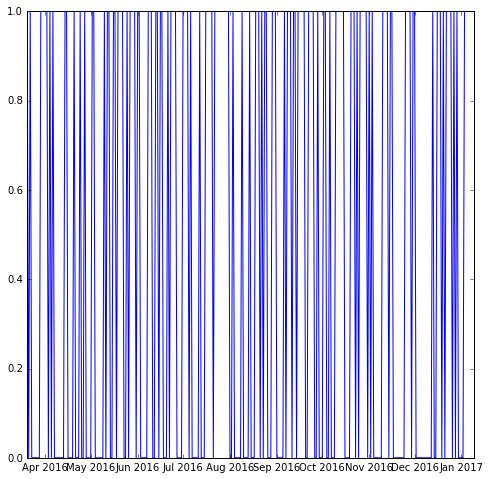

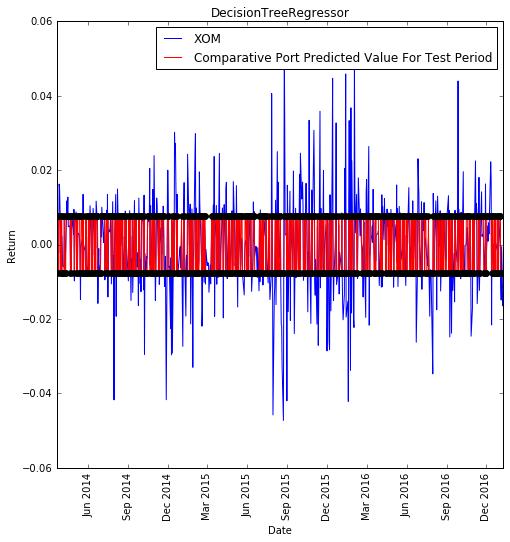

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .
Creating a model complexity graph. . . 


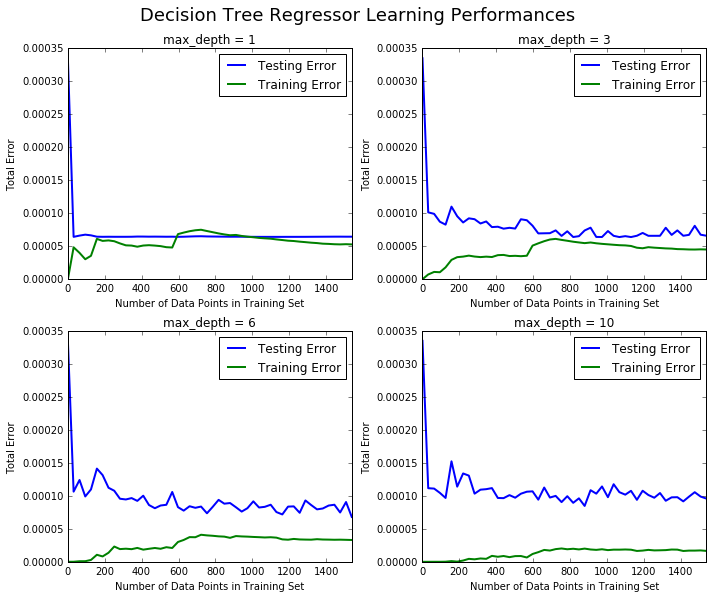

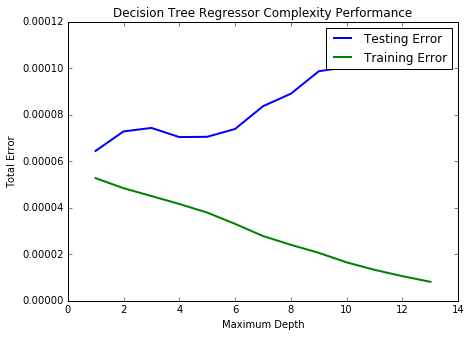

('GridSearchCV Tuning on Decission Tree Regressor ', ('DecisionTreeRegressor Best Estimator ', DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='True', random_state=None,
           splitter='best'), 'DecisionTreeRegressor MSE =', 6.4470216005132615e-05, 'DecisionTreeRegressor R2 =', 0.50564567164627916))

('KNeighborsRegressor Score = ', 0.49685122146121108)


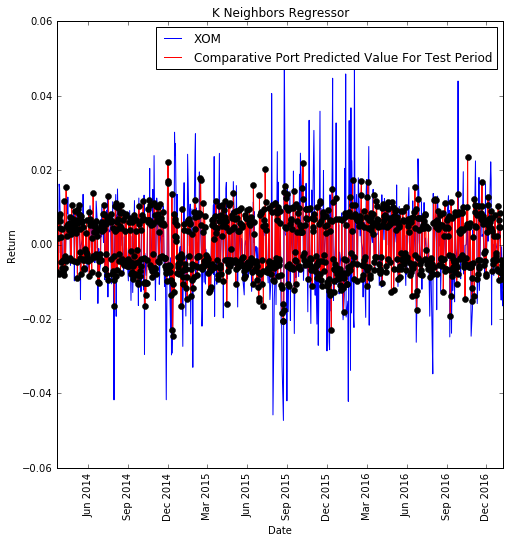

('KNN Regression Score  ', ('KNeighborsRegressor MSE =', 6.5617126369942904e-05, 'KNeighborsRegressor R2 =', 0.49685122146121108))

('RandomForestRegressor Score = ', 0.51153861283566837)


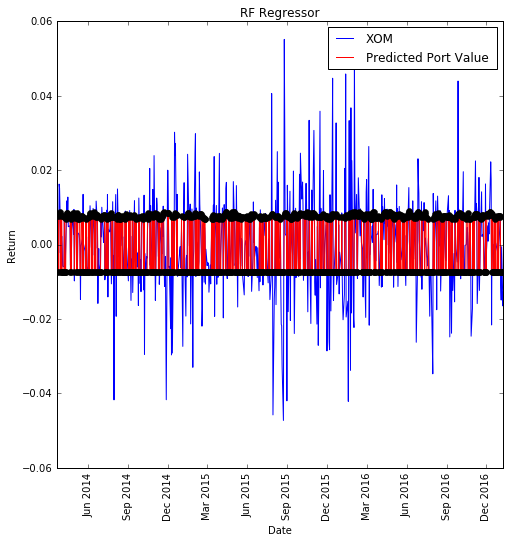

('RandomForest Regression Score  ', ('XOM', 'y_test, Random Forest Predicted Mean Square Error =', 6.3701700044828074e-05, 'and Random Forest R-Square =', 0.51153861283566837))

('SVR Score = ', -0.1638811955552868)


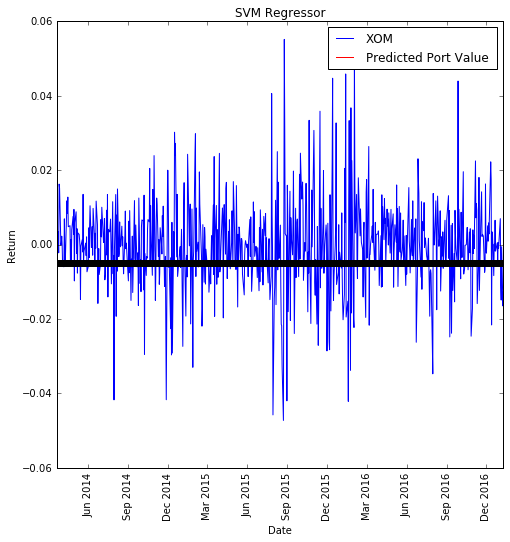

('SVR Regression Score  ', ('SVR Mean Square Error =', 0.00015178520299729577, 'SVR R2 =', -0.1638811955552868))

('BaggingRegressor Score = ', 0.50650955697014655)


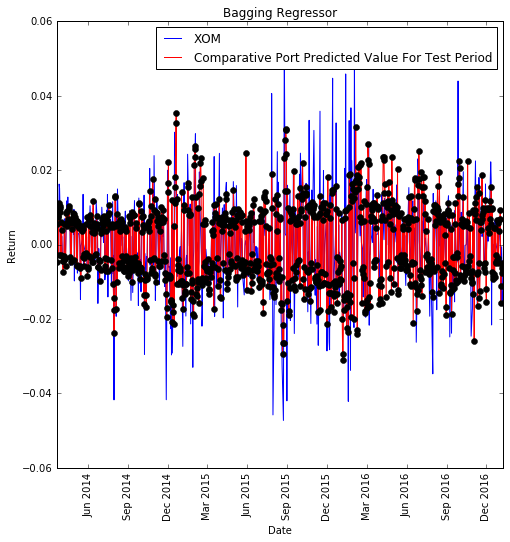

('Bagging Regression Score  ', ('BaggingRegressor MSE =', 6.4357554154635896e-05, 'BaggingRegressor R2 =', 0.50650955697014655))

('AdaBoostRegressor Score = ', 0.40163399014119183)


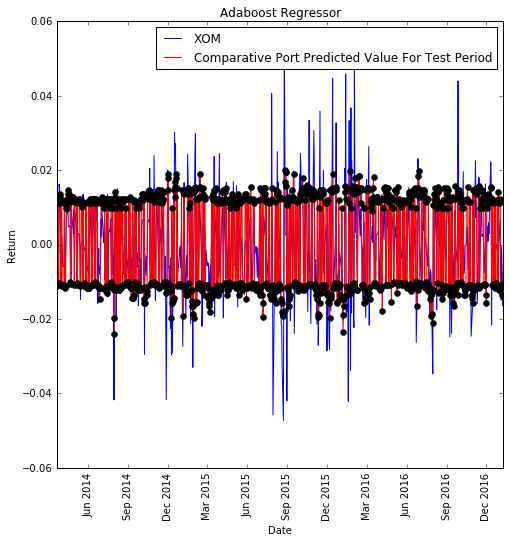

('AdaBoost Regression Score  ', ('AdaBoost MSE =', 7.8034688265385581e-05, 'AdaBoost R2 =', 0.40163399014119183))

('GradientBoostingRegressor Score = ', 0.53890562580702239)


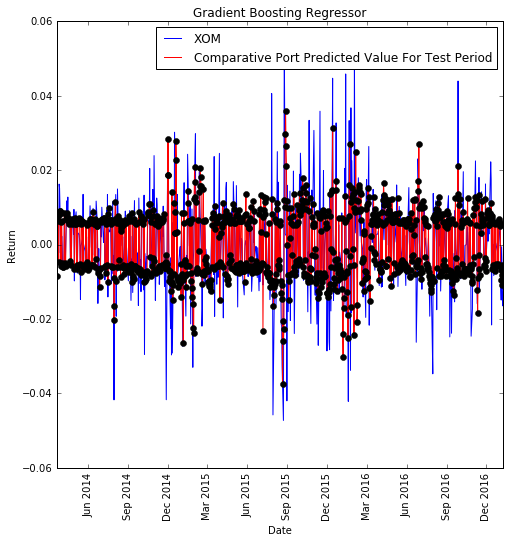

('GradientBoosting Regression Score  ', ('GradientBoosting MSE =', 6.013268661360343e-05, 'GradientBoosting R2 =', 0.53890562580702239))


In [127]:
import datetime


stock_file_directory='C:/Training/udacity/MachineLearningEngineerNanodegree/P5/Project/Final/BackTestClassRegression/data/'



def Back_Test_Ticker():
    """
    Initial parameter settings 
    
    Ticker_To_Analyze This the ticker that we would like to analyze
    Indexing_Ticker This is the Index Tickers that we will build our models to comapre with
    Analysis_start_date This is the start date for the ticker data 
    Analysis_end_date This is the end date for the ticker data)
    Index_Comp_Start_Date This is the start date for the Index ticker data
    Index_Comp_End_Date This is the end date for the Index ticker data
    Train_start_Date Training will be performed on the datasets before this date
    MoveUp--> Shift up by the range mentioned in the range to remove any NaN     
    """
    Ticker_To_Analyze ='XOM'
    Indexing_Ticker = ['WTI','BRENT','VIX']
    Analysis_start_date = datetime.datetime(2010,1,1)
    Analysis_end_date = datetime.datetime(2017,1,10)
    Index_Comp_Start_Date = datetime.datetime(2010,1,1)
    Index_Comp_End_Date = datetime.datetime(2017,1,10)
    Train_start_Date = datetime.datetime(2016, 3, 20)
    MoveUp = range(2, 3)
    


    """
    getPortfolioData is called to download Index data for the specific date ranges , in this case it is XOM data for date range
    between 10th Jan 2017 and 1st Jan 2010
    """
    Ticker_To_Predict = downloadStockToPredict(Ticker_To_Analyze, Analysis_start_date, Analysis_end_date,stock_file_directory)
    
    """
    downloadStockToPredict is called to download data for the specific date ranges , in this case it is XOM data for date range
    between 10th Jan 2017 and 1st Jan 2010
    """    
    Index_Compare = getPortfolioData(stock_file_directory,Index_Comp_Start_Date,Index_Comp_End_Date,Indexing_Ticker)

    """
    Adding XOM as the first data set in the frame
    """
    Index_Compare.insert(0, Ticker_To_Predict) 
    
    """
    After inserting XOM now I am renaming the dataset to Portfolio_Analysis_Dataset
    """
    Portfolio_Analysis_Dataset=Index_Compare
    
    """
    Some of my validation and crosscheck not required for Final run and I will comment this
    """
#    print("Printing Data for ",Ticker_To_Analyze)
#    print(Ticker_To_Predict.tail())
    
    """
    Add additional 4 features  features for <Ticker>_ADJ_CL_PCT_CHG_DAY_<range> 
    and <Ticker>_Mov_Agv_Day_Interval_<Range>
       
    """
    
    Add_Features = range(2, 6)
#    print ('Max Delta days accounted: ', max(Add_Features))
    Portfolio_dataset,count_NaN=check_AddFeatures(Portfolio_Analysis_Dataset,Add_Features,Ticker_To_Analyze,MoveUp)


    """
    Calling prepareDataForClassification to prepare training and testing data sets to be used By CLASSIFICATION MODELs
    
    """
    X_train, y_train, X_test, y_test  = prepareDataForClassification(Portfolio_dataset, Train_start_Date,Ticker_To_Analyze)
    
    """
    Checking for NaN and Infinity in daytasets To make sure if dataset is clean or not for analysis
    
    """
    print('')
#    print 'Maximum days Move Up :', max(MoveUp)
    print("NaN Infinity checker :", check_null_infinite_value(X_train, y_train, X_test, y_test)  )         
    print('')
    
    """
    Calling Multiple Model Of Classification
    """  
    print('========== Classification Results ===============================')
    print("Classification Randon Forest Score :", performRFClass(X_train, y_train, X_test, y_test))
    print("Classification KNN Score :", performKNNClass(X_train, y_train, X_test, y_test))
    print("Classification SVM Score :", performSVMClass(X_train, y_train, X_test, y_test))
    print("Classification GradientBoostingClassifier Score :", performGTBClass(X_train, y_train, X_test, y_test))
    print("Classification QDA Score :", performQDAClass(X_train, y_train, X_test, y_test))
    print('')    
            
        
    """
    Calling callRegressionModel to prepare training and testing data sets to be used By REGRESSION MODELS
    
    """    
    X_train_reg, y_train_reg, X_test_reg, y_test_reg,output = callRegressionModel(Portfolio_dataset,.6)

    """
    Calling Multiple Model For Regression
    """    
    print('========== Regression Results ===============================')
    print ('GridSearchCV Tuning on Decission Tree Regressor ', exeDecisionTreeRegressor(X_train_reg, y_train_reg, X_test_reg, y_test_reg))
    print('') 
    print ('KNN Regression Score  ', exeKNeighborsRegressor(X_train_reg, y_train_reg, X_test_reg, y_test_reg))
    print('') 
    print ('RandomForest Regression Score  ',exeRandomForestRegressor(X_train_reg, y_train_reg, X_test_reg, y_test_reg))
    print('') 
    print ('SVR Regression Score  ',exeSVR(X_train_reg, y_train_reg, X_test_reg, y_test_reg))
    print('') 
    print ('Bagging Regression Score  ',exeBaggingRegressor(X_train_reg, y_train_reg, X_test_reg, y_test_reg))
    print('') 
    print ('AdaBoost Regression Score  ',exeAdaBoostRegressor(X_train_reg, y_train_reg, X_test_reg, y_test_reg))
    print('') 
    print ('GradientBoosting Regression Score  ',exeGradientBoostingRegressor(X_train_reg, y_train_reg, X_test_reg, y_test_reg))
 
   
def check_AddFeatures(Portfolio_Analysis_Dataset,Add_Features,Ticker_To_Analyze,MoveUp):
    for Individual_dataset in Portfolio_Analysis_Dataset:
        columns = Individual_dataset.columns    
        adjclose = columns[-2]
        returns = columns[-1]
        for n in Add_Features:
            addAdjClosePercentChangeAndMovingAvgOfReturn(Individual_dataset, adjclose, returns, n)
        
    Portfolio_dataset = keepCalculatedColumnsOnly(Portfolio_Analysis_Dataset)

    print ('Initial Size of portfolio: ', Portfolio_dataset.shape)
    print ('Total Percentage of Non Numeric and Infinity in Initial Portfolio: ', (Find_NaN(Portfolio_dataset)/float(Portfolio_dataset.shape[0]*Portfolio_dataset.shape[1]))*100, '%')
    
    """
    REMOVING NaN, Missing Data and Removing Infinite 
    
    1. Using interpolate fill the missing data for dates in between dates
    2. Use Fillna to fill in the missing data after interpolation
    """
    Portfolio_dataset = Portfolio_dataset.interpolate(method = 'time')
    print("Total Number Of Datapoint Interpolated ",Portfolio_dataset.count().sum())
    print ('Post interpolation Percentage of Non Numeric and Infinity: ', (Find_NaN(Portfolio_dataset)/float(Portfolio_dataset.shape[0]*Portfolio_dataset.shape[1]))*100, '%')
    Portfolio_dataset = Portfolio_dataset.fillna(Portfolio_dataset.mean())
    print ('Post interpolation & Fillna Percentage of Non Numeric and Infinity: ', (Find_NaN(Portfolio_dataset)/float(Portfolio_dataset.shape[0]*Portfolio_dataset.shape[1]))*100, '%')
#    print("interpolate fill NA ",Portfolio_dataset.count().sum())
    back = -1
    """
    Pass the Ticker Name , in this case it is Return_XOM
    """
    Portfolio_dataset = Portfolio_dataset.rename(columns={'Return_'+Ticker_To_Analyze:'Return_Out'})
    Portfolio_dataset.Return_Out = Portfolio_dataset.Return_Out.shift(back)
    Portfolio_dataset = Portfolio_dataset.rename(columns={'Return_Out':'Return_'+Ticker_To_Analyze})
    Portfolio_dataset = Remove_NaN(Portfolio_dataset, MoveUp, Add_Features, back)
#    print 'Number of NaN after temporal shifting: ', Find_NaN(Portfolio_dataset)
    count_NaN =Find_NaN(Portfolio_dataset)
    print ('Final  Size of portfolio: ', Portfolio_dataset.shape)
    return Portfolio_dataset,count_NaN
    
    
if __name__ == "__main__":
    Back_Test_Ticker() 

## Classification Scores:
Randon Forest Score    :0.57770270270270274
KNN Score              :-0.78582202111613864
SVM Score              :0.53378378378378377
GradientBoosting Score :0.58108108108108103
QDA Score              :0.5033783783783784

## Regression Scores
DecisionTree     MSE :6.4470216005132615e-05,  DecisionTree     R2 :0.50564567164627916
KNeighbors       MSE : 6.5617126369942904e-05, KNeighbors       R2 :0.49685122146121108
RandomForest     MSE :6.3701700044828074e-05,  RandomForest     R2 :0.51153861283566837
SVR              MSE :0.00015178520299729577,  SVR              R2 :-0.1638811955552868
Bagging          MSE :6.4357554154635896e-05,  Bagging          R2 :0.50650955697014655
AdaBoost         MSE :7.8034688265385581e-05,  AdaBoost         R2 :0.40163399014119183
GradientBoosting MSE :6.013268661360343e-05,   GradientBoosting R2 :0.53890562580702239

## Conclusion
In my analysis I see that Gradient Boosting may be the best model(for both Classification and Regression)to perform backtest on XOM with respect to ^VIX (Volatility), BRENT(crude oil), WTI(crude). Caution this model/program should not be used for actual trading as there are many other factor like macro economic conditions, country specific GDP growth, Geo Political conditions etc. have not been considered. The model/analysis is just for the purpose of education/training/learning.
